In [24]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.append(r"/home/rachas/PycharmProjects/Udacity/ud120-projects-master/tools")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.preprocessing import MinMaxScaler
import numpy

In [25]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

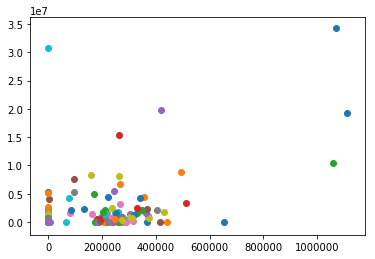

In [26]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( 
    open("/home/rachas/PycharmProjects/Udacity/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
#features_list = [poi, feature_1, feature_2]
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2)
plt.show()

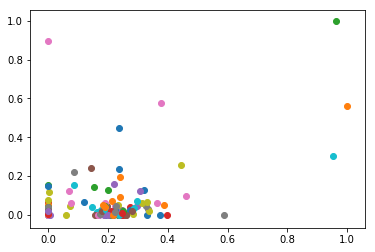

In [27]:
# Feature scaling
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( 
    open("/home/rachas/PycharmProjects/Udacity/ud120-projects-master/final_project/final_project_dataset.pkl", "rb") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"

poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

min_max_scalar = MinMaxScaler()

finance_features_scaled = min_max_scalar.fit_transform(finance_features)

### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features_scaled:
    plt.scatter( f1, f2)
plt.show()

In [30]:
finance_features_scaled

array([[  3.29165684e-01,   0.00000000e+00],
       [  2.40360024e-01,   1.94493691e-01],
       [  1.53826564e-01,   1.42374791e-01],
       [  0.00000000e+00,   1.89776031e-02],
       [  2.18934757e-01,   1.61230322e-01],
       [  2.40351925e-01,   0.00000000e+00],
       [  0.00000000e+00,   1.43671679e-02],
       [  3.33359130e-01,   3.21428222e-02],
       [  3.36667992e-01,   1.77228134e-02],
       [  1.77358453e-01,   2.56282799e-02],
       [  1.17636049e-01,   6.64592547e-02],
       [  2.23661832e-01,   2.22809026e-02],
       [  2.31706768e-01,   0.00000000e+00],
       [  0.00000000e+00,   6.45816409e-02],
       [  0.00000000e+00,   1.08361721e-02],
       [  2.59653474e-01,   0.00000000e+00],
       [  2.26458662e-01,   3.07531207e-02],
       [  2.59667872e-01,   5.38782261e-03],
       [  5.73620167e-02,   0.00000000e+00],
       [  0.00000000e+00,   2.99964330e-02],
       [  3.21339419e-01,   1.26542896e-01],
       [  2.44265508e-01,   2.35941231e-03],
       [  

In [28]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(finance_features_scaled)
pred = kmeans.predict(finance_features_scaled)

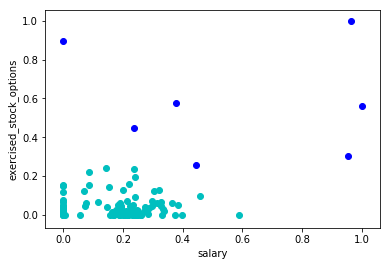

In [29]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features_scaled, poi, mark_poi=False, name="clusters_4.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print ("no predictions object named pred found, no clusters to plot")

# Practice

In [95]:
stocklist=[]

for k, v in data_dict.items():
    if not ((data_dict[k]["exercised_stock_options"]) == "NaN"):
        stocklist.append(data_dict[k]["exercised_stock_options"])
        
print(("max is {0}").format(max(stocklist)))
print(("min is {0}").format(min(stocklist)))

max is 34348384
min is 3285


In [96]:
salarylist=[]

for k, v in data_dict.items():
    if not ((data_dict[k]["salary"]) == "NaN"):
        salarylist.append(data_dict[k]["salary"])
        
print(("max is {0}").format(max(salarylist)))
print(("min is {0}").format(min(salarylist)))

max is 1111258
min is 477
